# Predição do gênero musical com Machine Learning
fonte: https://www.kaggle.com/mrmorj/dataset-of-songs-in-spotify

Problema de negócio: a partir da variáveis do conjunto de dados, faça a clasificação do gênero musical



In [2]:
#Análise exploratória(EDA)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#Modelos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Modelos de avaliação/seleção de features
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Load data

In [3]:
data=pd.read_csv("genres_v2.csv")
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [4]:
#Tamanho do conjunto de cados(Linhas, colunas)
data.shape

(22880, 22)

In [5]:
#Análise do target, ou seja variável a ser predita
data["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
techhouse          1354
Pop                 461
Name: genre, dtype: int64

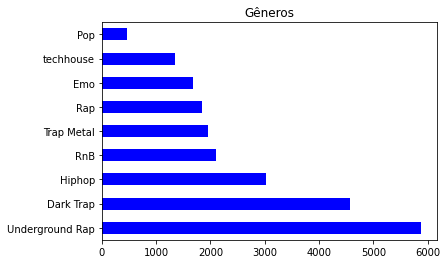

In [6]:
#De forma mais visual todos os Gêneros
data["genre"].value_counts().plot(kind="barh",color=["blue"],title="Gêneros");

In [7]:
#Verificando valores ausentes, missing values
data.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            1
duration_ms             1
time_signature          1
genre                   1
song_name            1361
Unnamed: 0          21526
title               21526
dtype: int64

In [8]:
#Tipos de dados do dataframe
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms         float64
time_signature      float64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

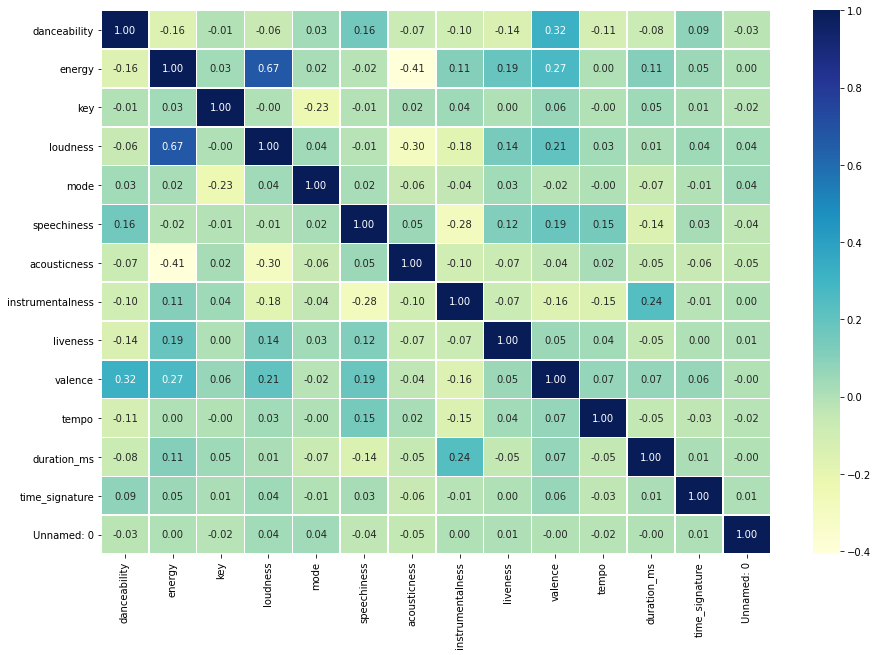

In [9]:
#Plotando mtriz de correlação entre as váriaveis
corr_matrix=data.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## Tratamento dos dados

In [10]:
#Excluindo as colunas não necessárias para o modelo
num_data=data.drop(["title","Unnamed: 0","song_name","analysis_url","track_href","uri","id","type"],axis=1) #drop all non-numeric columns
#Separando as váriaveis, onde em X serão alocadas as variáveis preditoras e y será variável resposta
X=num_data.drop("genre",axis=1)
y=num_data["genre"]
X.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
dtype: object

In [11]:
X.dropna(inplace=True)

In [12]:
X.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [13]:
y.isnull().sum()

1

In [14]:
y.dropna(inplace=True)

In [15]:
#Separando dados de treino e teste para o modelo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
#Criando dicionário com os mdelos q serem avaliados
models={"LogReg":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
#Função de treino e avaliação do modelo
def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Essa função recebe os modelos e os dados de treino e teste, cada modelo é treinado e posteriormente pegamos o score passados dados de teste.
  
    """
    np.random.seed(1) #Controle de aleatóriedade para o modelo use sempre os mesmos dados dados de treino e teste, semelhante ao random_state=1
    model_scores={} 
    for name , model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [17]:
model_scores=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'KNN': 0.23601398601398602,
 'LogReg': 0.2789918414918415,
 'Random Forest': 0.4865967365967366}

## Comparando score dos modelos

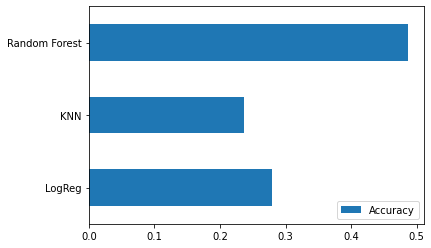

In [18]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.barh();

Escolhendo os melhores parâmetros para o modelo

---



In [43]:
# Numero de árvores
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 5)] #3 valores de estimadores, começando com 10 e terminando com 40
# Número de máximo de características a serem utilizadas pelo algoritmo
max_features = ['auto', 'sqrt', 'log2']
# Produndidade máxima da árvore
max_depth = [3, 5, 9]
# Número minio de amostras para cada nó
min_samples_split = np.arange(2,10,2)
# Número minimo de folha da árvore
min_samples_leaf = np.arange(1,10,2)
# Método de seleção de amostras
bootstrap = [True, False]

In [44]:
# Dicionário com os parâmetros
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Sobre o GridSearchCV
Basicamente o GridSearchCV faz pesquisa "exaustiva" sobre valores de parâmetros para um modelo.

Os parâmetros do modelo usados ​​para aplicar esses métodos são otimizados por uma pesquisa em grade validada cruzada(cv) em uma grade de parâmetros.

In [45]:
# Passando os parâmetros para o GriSearchCV
rf_Grid = GridSearchCV(estimator = models["Random Forest"], param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [46]:
#Treinando
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   53.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 13.7min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 20.5min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 25.5min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 31.8min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 5400 out of 5400 | elapsed: 50.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [47]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 8,
 'n_estimators': 80}

In [48]:
clf = RandomForestClassifier(bootstrap = True,
                             max_depth = 9, 
                             max_features = 'sqrt', 
                             min_samples_leaf = 7, 
                             min_samples_split = 8, 
                             n_estimators = 80, random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
clf.score(X_test,y_test)

0.5281177156177156

Resultados

In [55]:
print('Modelo com parâmetros Default:',models["Random Forest"].score(X_test,y_test))
print('Modelo com hiperparâmetros do GridseartCV:', clf.score(X_test,y_test))

Modelo com parâmetros Default: 0.4865967365967366
Modelo com hiperparâmetros do GridseartCV: 0.5281177156177156
